In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import MiniBatchKMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# First, create a sample data set containing 10 million rows
# Filter GenZ rows from the sample data set
# sample data set to train the Kmeans model, just use the function pipeline, which return res, kmeans
# Use kmeans to predict description of GenZ account in each sample data set

In [3]:
def get_top_features_cluster(tf_idf_vectorizor,tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features','score'])
        dfs.append(df)
    return dfs

In [4]:
# Concatenate seperate dataframes
# Input is a list of dataframes
def concatdf(dfs):
    res = dfs[0]
    for num in range(1,len(dfs)):
        res = pd.concat([res,dfs[num]],axis=1)
    return res

In [5]:
# Use this function to implement TF-IDF, PCA and kmeans over input dataframe in sequence
# input is a file path
def pipeline(file):
    
    df = pd.read_csv(file) #Read file
    data = df['ACTIVITY_DESC_01'].dropna() # Select description column and drop null rows
    del df # delete nonuseable variable and free RAM
    
    # Use TF-IDF to vectorize the text
    tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 200) # Instantiate a TF class
    tf_idf = tf_idf_vectorizor.fit_transform(data)
    tf_idf_norm = normalize(tf_idf)
    tf_idf_array = tf_idf_norm.toarray()
    del data,tf_idf,tf_idf_norm # Delete variables and release RAM
    
    # Use PCA to reduce dimension
    pca = PCA(n_components=100) # Instantiate a PCA class
    tf_new = pca.fit_transform(tf_idf_array) # tf_new is the transformed matrix derived from PCA

    # Use Kmeans to cluster inputs
    kmeans = MiniBatchKMeans(n_clusters= 160, random_state= 0) # Use Minibatchkmeans to speed up
    kmeans.fit(tf_new)
    print(kmeans.score(tf_new)) # Get the score of Kmeans model
    pre = kmeans.predict(tf_new)
    dfs = get_top_features_cluster(tf_idf_vectorizor,tf_idf_array, pre, 5) # Get top 5 common words of each cluster
    res = concatdf(dfs) # Concatenate the seperate dataframes
    return res,kmeans

In [6]:
# This operation will need about 19 minutes
res,kmeans = pipeline('GenZ_Sample1.csv')

-481520.3988132584


In [12]:
res

,features,score,features,score,features,score,features,score,features,score,...,features,score,features,score,features,score,features,score,features,score
0,crd,0.603758,chk,0.711746,pur,0.882768,chk,0.236576,wal,0.836475,...,dd,0.740551,apple,0.623339,com,0.875975,ugi,0.800743,amazon,0.712989
1,chk,0.453990,crd,0.702437,pos,0.469809,crd,0.233482,pos,0.362451,...,br,0.368199,com,0.537937,chk,0.343315,utilities,0.497546,com,0.615012
2,pos,0.451335,xfer,0.000000,xfer,0.000000,starbucks,0.138733,pur,0.340521,...,chk,0.208712,rec,0.502681,crd,0.338825,online,0.090324,chk,0.238375
3,pur,0.087760,el,0.000000,echeck,0.000000,subway,0.084261,chk,0.022196,...,crd,0.205982,pur,0.263389,echeck,0.000000,pmt,0.087094,crd,0.235258
4,echeck,0.000000,fil,0.000000,fe,0.000000,pizza,0.081913,crd,0.021906,...,pos,0.000579,xfer,0.000000,fil,0.000000,autopay,0.003430,rec,0.000022


In [7]:
# Return specific columns of result, begin_column
# and end_column are integer between (1,312)
def showres(res,begin_column,end_column):
    return res.iloc[:,begin_column,end_column]

In [8]:
# Use this function to save dataframe as csv file
# res is the dataframe, and filename need to be like "xxx.csv"
def savecsv(res,filename):
    res.to_csv(filename,index=False)

In [10]:
savecsv(res,'cluster_of_sample1.csv')

In [17]:
df = pd.read_csv('GenZ_Sample1.csv').dropna()

In [18]:
df_trans = df['ACTIVITY_DESC_01']

In [20]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 200) # Instantiate a TF class
tf_idf_1 = tf_idf_vectorizor.fit_transform(df_trans)
tf_idf_norm_1 = normalize(tf_idf_1)
tf_idf_array_1 = tf_idf_norm_1.toarray()

In [21]:
pca = PCA(n_components=100) # Instantiate a PCA class
tf_new_1 = pca.fit_transform(tf_idf_array_1) # tf_new is the transformed matrix derived from PCA


In [22]:
df['pre'] = kmeans.predict(tf_new_1)

In [25]:
df_genz = df[df['genz'] == 1]

In [27]:
df_genz

,acct_id,ACTIVITY_DESC_01,genz,pre
2,4827A05037B35E8AAD557E8A43529A6BD6EA27D0686E76...,CHK CRD Amazon Pri 0321,1,93
11,876D5E18A3D3F83E92E5B3A26837152D7A9E3CC24B724F...,CHK CRD THE SALVAT 9247,1,1
16,A5F692352F47A31131FACC94F7CA702D955A65F81C666F...,CHK CRD www.palott 2053,1,3
30,E998A0634F37A147BB5491C37381D491E6D7B1C4A9F898...,CHK CRD VENMO *TR 2135,1,16
46,EF002538D6B6FE167FACF7546FB4648A421A1B376911B4...,CHK CRD APPLE.COM/ 2339,1,56
...,...,...,...,...
9999951,3E76C082487E16E5D796E428E1B551A589021811BD5C30...,POS PUR CVS/PHARMA 0039,1,115
9999952,23A177CCFE92E39284C7F024F404E61330C3BFD47F1727...,POS PUR TURKEY HIL 9245,1,134
9999962,0E836C0EEB854F0E05C26C0769C20482B2D03054CA3792...,ACIMA 8012971982,1,97
9999989,8483DB89D60773F9BD6047143BB73062F48F6E9B435B01...,MNY TRF CASH APP*R 5701,1,74


In [29]:
del df, df_trans, tf_idf_vectorizor, tf_idf_1, tf_idf_norm_1, tf_idf_array_1, pca, tf_new_1

NameError: name 'df' is not defined

In [36]:
dic = {1:'General purchases',
       2:'General purchases',
       3:'General purchases',
       4:'Restaurant',
       5:'General purchases',
       6:'Money Transfer',
       7:'Supermarket/General Stores', 
       8:'Supermarket/General Stores',
       9:'Restaurant', 
       10:'Bill payment',
       11:'Online Shopping', 
       12:'General purchases',
       13:'Gas Station', 
       14:'Convenience Store',
       15:'Insurance', 
       16:'Bill payment',
       17:'Money Transfer',
       18:'Supermarket/General Stores',
       19:'Gas Station',
       20:'Digital Payments',
       21:'Supermarket/General Stores',
       22:'Supermarket/General Stores',
       23:'Convenience Store',
       24:'Convenience Store',
       25:'Bill payment',
       26:'General purchases',
       27:'Insurance',
       28:'General purchases',
       29:'Supermarket/General Stores',
       30:'Online Video Streaming Service',
       31:'Unknown',
       32:'Supermarket/General Stores',
       33:'Restaurant',
       34:'Bank',
       35:'Insurance',
       36:'Bill payment',
       37:'Supermarket/General Stores',
       38:'Investment',
       39:'Supermarket/General Stores',
       40:'General purchases',
       41:'Bill payment',
       42:'Bill payment',
       43:'Bill payment',
       44:'Money Transfer',
       45:'Supermarket/General Stores',
       46:'General purchases',
       47:'Bill payment',
       48:'Unknown',
       49:'Unknown',
       50:'Bill payment',
       51:'Gas Station',
       52:'Gas Station',
       53:'Restaurant',
       54:'Bill payment',
       55:'Bill payment',
       56:'Unknown',
       57:'Convenience Store',
       58:'Supermarket/General Stores',
       59:'Gas Station',
       60:'Gas Station',
       61:'Money Transfer',
       62:'Online Video Streaming Service',
       63:'Supermarket/General Stores',
       64:'Unknown',
       65:'General purchases',
       66:'Unknown',
       67:'Unknown',
       68:'Bill payment',
       69:'Investment',
       70:'Money Transfer',
       71:'Unknown',
       72:'Bill payment',
       73:'Money Transfer',
       74:'Supermarket/General Stores',
       75:'Bill payment',
       76:'Gas Station',
       77:'Home improvement',
       78:'Bill payment',
       79:'Supermarket/General Stores',
       80:'Bill payment',
       81:'Bill payment',
       82:'Food Delivery',
       83:'Bill payment',
       84:'Restaurant',
       85:'Bill payment',
       86:'Gas Station',
       87:'Supermarket/General Stores',
       88:'Convenience Store',
       89:'General purchases',
       90:'Restaurant',
       91:'Supermarket/General Stores',
       92:'Online Shopping',
       93:'Bill payment',
       94:'Money Transfer',
       95:'Bill payment',
       96:'Supermarket/General Stores',
       100:'Supermarket/General Stores',
       101:'Bill payment',
       102:'General purchases',
       103:'Insurance',
       104:'Online Shopping',
       105:'Supermarket/General Stores',
       106:'Bill payment',
       107:'Supermarket/General Stores',
       108:'Insurance',
       109:'Supermarket/General Stores',
       110:'Convenience Store',
       111:'Gas Station',
       112:'Bank',
       113:'Convenience Store',
       114:'Supermarket/General Stores',
       115:'Bill payment',
       116:'Bill payment',
       117:'Bill payment',
       118:'Online Shopping',
       119:'Supermarket/General Stores',
       120:'Supermarket/General Stores',
       121:'Supermarket/General Stores',
       122:'Bill payment',
       123:'Insurance',
       124:'Convenience Store',
       125:'Supermarket/General Stores',
       126:'Home improvement',
       127:'Restaurant',
       128:'Bill payment',
       129:'Gym membership',
       130:'Transportation',
       131:'Supermarket/General Stores',
       132:'Bill payment', 
       133:'Convenience Store',
       134:'Unknown',
       135:'Home improvement',
       136:'Mail and Package Delivery Service',
       137:'Bill payment',
       138:'Supermarket/General Stores',
       139:'Gas Station',
       140:'Supermarket/General Stores',
       141:'Gas Station',
       142:'Unknown',
       143:'Unknown',
       144:'Bill payment',
       145:'Supermarket/General Stores',
       146:'Supermarket/General Stores',
       147:'General purchases',
       148:'Bill payment',
       149:'Money Transfer',
       150:'Bill payment',
       151:'Gas Station',
       152:'Supermarket/General Stores',
       153:'Unknown',
       154:'Bill payment',
       155:'Bill payment',
       156:'Bill payment',
       157:'Online Shopping'
}

In [38]:
df = pd.read_csv('GenZ_Sample1.csv').dropna()
df_trans = df['ACTIVITY_DESC_01']
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 200) # Instantiate a TF class
tf_idf_1 = tf_idf_vectorizor.fit_transform(df_trans)
tf_idf_norm_1 = normalize(tf_idf_1)
tf_idf_array_1 = tf_idf_norm_1.toarray()
pca = PCA(n_components=100) # Instantiate a PCA class
tf_new_1 = pca.fit_transform(tf_idf_array_1) # tf_new is the transformed matrix derived from PCA
df['pre'] = kmeans.predict(tf_new_1)
df_genz1 = df[df['genz'] == 1]
del df, df_trans, tf_idf_vectorizor, tf_idf_1, tf_idf_norm_1, tf_idf_array_1, pca, tf_new_1

In [39]:
df_genz['text'] = df_genz1['pre'].apply(lambda x: dic.get(x))

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_genz

,acct_id,ACTIVITY_DESC_01,genz,pre,text
2,4827A05037B35E8AAD557E8A43529A6BD6EA27D0686E76...,CHK CRD Amazon Pri 0321,1,93,Bill payment
11,876D5E18A3D3F83E92E5B3A26837152D7A9E3CC24B724F...,CHK CRD THE SALVAT 9247,1,1,General purchases
16,A5F692352F47A31131FACC94F7CA702D955A65F81C666F...,CHK CRD www.palott 2053,1,3,General purchases
30,E998A0634F37A147BB5491C37381D491E6D7B1C4A9F898...,CHK CRD VENMO *TR 2135,1,16,Bill payment
46,EF002538D6B6FE167FACF7546FB4648A421A1B376911B4...,CHK CRD APPLE.COM/ 2339,1,56,Unknown
...,...,...,...,...,...
9999951,3E76C082487E16E5D796E428E1B551A589021811BD5C30...,POS PUR CVS/PHARMA 0039,1,115,Bill payment
9999952,23A177CCFE92E39284C7F024F404E61330C3BFD47F1727...,POS PUR TURKEY HIL 9245,1,134,Unknown
9999962,0E836C0EEB854F0E05C26C0769C20482B2D03054CA3792...,ACIMA 8012971982,1,97,None
9999989,8483DB89D60773F9BD6047143BB73062F48F6E9B435B01...,MNY TRF CASH APP*R 5701,1,74,Supermarket/General Stores


In [41]:
# The most common purchase type to GenZ sample2
df_genz['text'].value_counts()

General purchases                    347047
Supermarket/General Stores           141727
Bill payment                         105157
Unknown                               70042
Gas Station                           54368
Money Transfer                        36932
Restaurant                            30655
Convenience Store                     21780
Online Shopping                       13573
Bank                                  13538
Home improvement                       8452
Digital Payments                       8133
Insurance                              4635
Investment                             3484
Food Delivery                          2684
Mail and Package Delivery Service      1475
Gym membership                         1066
Online Video Streaming Service          909
Name: text, dtype: int64

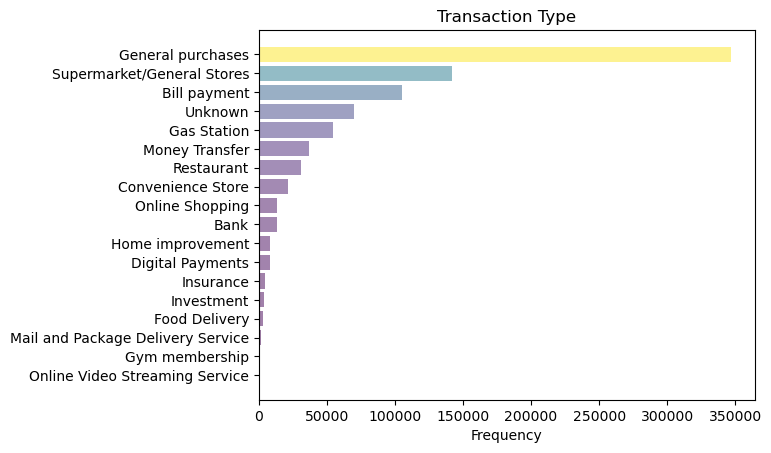

In [57]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt



objects = ('Online Video Streaming Service', 'Gym membership', 'Mail and Package Delivery Service', 'Food Delivery', 'Investment', 'Insurance', 'Digital Payments', 
'Home improvement', 'Bank', 'Online Shopping', 'Convenience Store', 'Restaurant', 'Money Transfer', 'Gas Station', 'Unknown', 'Bill payment', 'Supermarket/General Stores', 'General purchases')
y_pos = np.arange(len(objects))
performance = [909, 1066, 1475, 2684, 3484, 4635, 8133, 8452, 13538, 13573, 21780, 30655, 36932, 54368, 70042, 105157, 141727, 347047]
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("viridis")
plt.barh(y_pos, performance, align='center', alpha=0.5,color=my_cmap(rescale(performance)))
plt.yticks(y_pos, objects)
plt.xlabel('Frequency')
plt.title('Transaction Type')

plt.show()

In [58]:
plt.savefig('The frequency of transaction type for sample data1.png')

<Figure size 640x480 with 0 Axes>